<a href="https://colab.research.google.com/github/spargens/allAnimation1/blob/main/First_official_Convolutional_Neural_Network_for_classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem we will consider here is classifying 10 different everyday objects.The dataset we will use is built into tensorflow keras module and is called CIFAR Image Dataset.It contains 50000 32*32 color images with 5000 images of each class.
Different objects are:
[Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck]


Let's import the necessary modules and libraries.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

Importing the CIFAR image dataset.

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
train_images[0].shape

(32, 32, 3)

In [ ]:
type(test_labels)

numpy.ndarray

In [ ]:
type(train_images)

numpy.ndarray

I know you will be thinking that everytime we import data the syntax changes.But it is the way things are here.Everytime we are downloading datasets we are doing it from different modules.And every module requires different synytax to be accessed.So if you want to get rid of this thing you got to collect your own data, clean it, preprocces it and bring it to me and I will tell you a constant syntax to import that data.Now enough of this.

Let's preprocess the image to squeeze the pixel value between 0-1 instead of being in between 0-255.

In [ ]:
train_images,test_images=train_images/255.0,test_images/255.0

Creating the class name corresponding to CIFAR image dataset.

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Let's look at one of the training images.

<function matplotlib.pyplot.show>

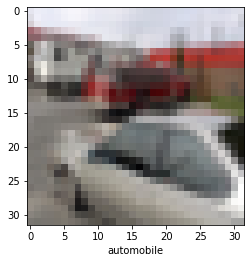

In [ ]:
IMG_INDEX=49999
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show


CNN ARCHITECTURE
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densly connected layers.The idea is that the stack of covolutional and maxPooling layers will extract the features from the image.Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

Let's start with the "Convolutional Base".

In [ ]:
model=models.Sequential()
#format of the Conv2D syntax- layers.Conv2D(num_of_filters,(size of filter),activation_fn,input_shape=(pixel,pixel,colorChannel))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
#format of the MaxPooling2D syntax- layers.MaxPooling2D((size of pooled outdput feature map))
model.add(layers.MaxPooling2D((2,2)))
#when add more layers you don't need to dfine input size.it automatically takes from above layer.
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

LAYER 1
The input shape of our data will be (32,32,3) and we will process 32 filters of size 3X3 over our input data.We will also apply the activation function relu to the output of each convolutional operation.

LAYER 2
This layer will perform the max pooling operations using 2X2 samples and stride of 2.

LAYER 3
The next set of layers do very similar things but take as input the feature map from the previous layer.They also increase the frequency of filters from 32 to 64.We can do this as our data shrinks in spacial dimensionality as it is passed through the layers,meaning we can afford(computationally) to add more depth.

Let's see how our model looks like.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Now here's the thing to observe.
The input was (32,32,3).But the output coming from the first layer is (30,30,3).This is because even with the least possible stride of 1 you are going to miss 1 row and 1 column of pixels.This is why 'padding' is recommended.
Further the max pooling is operating with the stride of 2 .So if you give it an input of even size of say,nxn it will return (n/2)x(n/2) sized matrix and if the input is odd it will return (n-1)/2x(n-1)/2 sized matrix.

After looking at the summary you should observe that the spacial dimensions get drastically reuced from (32,32) to (4,4) but the depth increases from 32 to 64.

Till now we have just extracted the features of the image.We need a dense neural network that can figure out that combiantion of what features can lead to one object being what it is.

ADDING DENSE LAYERS.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

So you can see after the architecture of CNN there is a three layered DNN.First is the input layer that is flattened to accomodate 4*4*64=1024 featurical values thrown out by the CNN.Then it contains the hidden layer containing 64 nodes densly connected.Both the input layer and the hidden layer uses 'relu' as the activation function.Then the output layer consists of 10 nodes corresponding to 10 different types of the object in the class.

After we have built the forward propogating mechanism,let's devlop the back propagation mechanism.In simple words let's compile the model.

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Now it is time to train the model.

In [ ]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.5852 - accuracy: 0.7931 - val_loss: 0.8934 - val_accuracy: 0.7047
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.5548 - accuracy: 0.8047 - val_loss: 0.9197 - val_accuracy: 0.6956
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5247 - accuracy: 0.8123 - val_loss: 0.9481 - val_accuracy: 0.7055
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4928 - accuracy: 0.8249 - val_loss: 0.9473 - val_accuracy: 0.7052
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4634 - accuracy: 0.8348 - val_loss: 0.9872 - val_accuracy: 0.6997
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.4366 - accuracy: 0.8458 - val_loss: 1.0536 - val_accuracy: 0.6922
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.4139 - accuracy: 0.8517 - val_loss: 1.0554 -

Now you may say that last time we segregated clothes just using DNN we got the accuracy to be around 90%.But here when we used more advanced technique of CNN why we got just shy of 72% accuracy.With due respect there has been misunderstanding.The accuracy you are looking at is of testing data because in above line of code we have smartly compressed the evaluating part with the training part.Those 90% accuracy you are talking about was of training data.

You can also separately evaluate the model.

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8817 - accuracy: 0.7122 - 4s/epoch - 12ms/step
0.7121999859809875


Same accuracy.Now you believe me that the accuracy you saw last time was of testing data and not of training data.

What does 'verbose' stands for?
verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

[===============>========]

verbose=2 will just mention the number of epoch like this:

Epoch 1/10

Let's build the prediction part by ourself.So the user will enter the index of image he want to be predicted from the test model.We have to display that image along with the reality and the guess.Let's do that.

Print the index of the image in the test_images dataset:
Pick a number:67
Correct label:bird
Guess label:bird


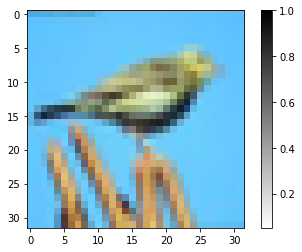

In [ ]:
def make_input():
   print("Print the index of the image in the test_images dataset:")
   num=input("Pick a number:")
   if num.isdigit():
     num=int(num)
     if(0<=num<=10000):
       return num
     else:
       print("Out of index.Index allowed 0 to 10000")
   else:
     print("Enter a valid digit.")



def predict(model,image,correct_label):
  class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  prediction=model.predict(np.array([image]))
  predicted_class=class_names[np.argmax(prediction)]
  print("Correct label:"+class_names[correct_label[0]])
  print("Guess label:"+predicted_class)
  show_image(image)


def show_image(img):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()


index=make_input()
image=test_images[index]
reality=test_labels[index]
predict(model,image,reality)



That's it!

WORKING WITH SMALL DATASETS




"DATA AUGMENTATION"

Working with small datasets. In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well.So we employ Data Augmentation technique.
Data augmentation simply refers to performing random transformations on our images so that our model can generalize better.These transformations can be things like compressions,rotations,stretches and even color changes.The concept is that a cat image is if flipped,zoomed or compressed is still a cat image and our model must know it.So we give our model such augmented data so that it can better generalize its predictions. Fortunately,keras module includes pre-built functions that can help us with these random transformations of images.
Importing the keras module that will help us with these random transformations.

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Creating a data generator object that transforms images.

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Picking the image to be transformed.

6753


array([[[0.43529412, 0.3254902 , 0.22352941],
        [0.41568627, 0.30588235, 0.17254902],
        [0.4745098 , 0.34901961, 0.21568627],
        ...,
        [0.30196078, 0.18823529, 0.1254902 ],
        [0.30588235, 0.19215686, 0.11372549],
        [0.29803922, 0.2       , 0.1372549 ]],

       [[0.42745098, 0.32156863, 0.23137255],
        [0.41960784, 0.30588235, 0.18039216],
        [0.4627451 , 0.34117647, 0.2       ],
        ...,
        [0.37647059, 0.25490196, 0.18823529],
        [0.38039216, 0.24705882, 0.17254902],
        [0.36470588, 0.24705882, 0.18823529]],

       [[0.44705882, 0.3372549 , 0.26666667],
        [0.51372549, 0.40392157, 0.28235294],
        [0.54509804, 0.42352941, 0.27843137],
        ...,
        [0.28235294, 0.20392157, 0.18039216],
        [0.30196078, 0.20784314, 0.18039216],
        [0.31372549, 0.21568627, 0.19215686]],

       ...,

       [[0.60784314, 0.32941176, 0.27843137],
        [0.63921569, 0.3372549 , 0.25490196],
        [0.60392157, 0

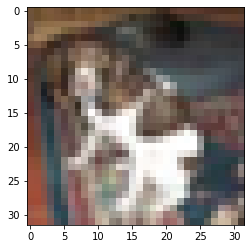

In [ ]:
#Please observe this section of code carefully because you will be surprised to see the datatype of image
index=input()
index=int(index)
trans_img=train_images[index]
plt.imshow(trans_img)
type(trans_img)
trans_img

Now there is a slight problem.The random image transformation function of keras which we are going to use takes data in form of 1-d numpy array.So we got to use one of the cool functions pre-built with the collaboration of "numpy" and "keras.image.preprocessing" called as "image.img_to_array" to convert the image into (32,32,3) numpy array and then we will reshape that numpy array into one over-arching dimension (1,32,32,3).Let's do this.

In [ ]:
img=image.img_to_array(trans_img)
img=img.reshape((1,)+img.shape)
img

array([[[[0.43529412, 0.3254902 , 0.22352941],
         [0.41568628, 0.30588236, 0.17254902],
         [0.4745098 , 0.34901962, 0.21568628],
         ...,
         [0.3019608 , 0.1882353 , 0.1254902 ],
         [0.30588236, 0.19215687, 0.11372549],
         [0.29803923, 0.2       , 0.13725491]],

        [[0.42745098, 0.32156864, 0.23137255],
         [0.41960785, 0.30588236, 0.18039216],
         [0.4627451 , 0.34117648, 0.2       ],
         ...,
         [0.3764706 , 0.25490198, 0.1882353 ],
         [0.38039216, 0.24705882, 0.17254902],
         [0.3647059 , 0.24705882, 0.1882353 ]],

        [[0.44705883, 0.3372549 , 0.26666668],
         [0.5137255 , 0.40392157, 0.28235295],
         [0.54509807, 0.42352942, 0.2784314 ],
         ...,
         [0.28235295, 0.20392157, 0.18039216],
         [0.3019608 , 0.20784314, 0.18039216],
         [0.3137255 , 0.21568628, 0.19215687]],

        ...,

        [[0.60784316, 0.32941177, 0.2784314 ],
         [0.6392157 , 0.3372549 , 0.25490198]

If you would have observed the above code carefully,you would have noticed that even the extracted image was stored in form of numpy array.So now what we are trying to convert it into by using the above code.
Actually there seems to be different kind of numpy arrays.The kind of numpy array that stored the data of the image in test_images dataset is different than what is compatible with ImageDataGenerator.I have printed both the arrays so you can compare them.So that's pro level thing.

Now it is time to randomly transform the images.

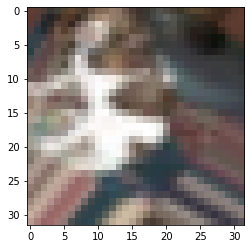

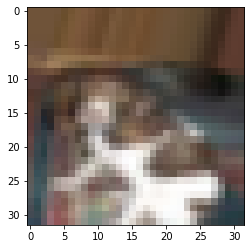

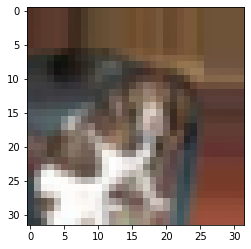

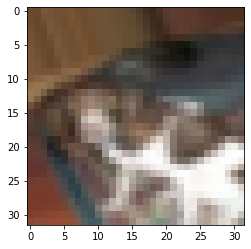

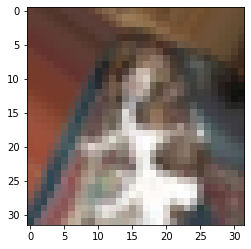

In [ ]:
i=0
for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):
  plt.figure(i)
  new_img=image.img_to_array(batch[0])
  plt.imshow(image.img_to_array(batch[0]))
  i+=1
  if i>4:
    break


In [ ]:
type(new_img)

numpy.ndarray

In [ ]:
new_img.shape

(32, 32, 3)

In [ ]:
plt.imshow(new_img)

In [ ]:
predictions=model.predict(np.array([new_img]))
predicted_object=class_names[np.argmax(predictions)]
predicted_object

'dog'

PICKING A PRE_TRAINED MODEL

The model we are going to use as the convolutional base for our model is the MobileNet V2 developed at Google.This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only it's convolutional base.So when we load in the model we'll specify that we don't want to load the top (classification) layer.We'll tell the model what input shape to expect and to use the predetermined weights from imagenet(Googles dataset).

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Images=pd.read_csv("/content")

IsADirectoryError: ignored

In [ ]:
IMG_SHAPE=(IMG_SIZE,IMG_SIZE,3)
base_model=tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

NameError: ignored

"include_top=False" means that we are not importing the top classifier layer of the model.

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
for image, _in train.batches.take(1):
  pass

feature_batch=base_model(image)
print(feature_batch.shape)

SyntaxError: ignored

In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

Now let's add our own classifier layer to this base layer.

In [ ]:
global_average_layer=tf.keras.layers.GlobalAveragePooling2D()

This layer pools the (5,5,1280) tensor by taking average of each 5x5 tensor.Then it flattens the values out to create 1280 one line values.

Now let's create the dense layer.

In [ ]:
prediction_layer=tf.keras.layers.Dense(1)

We just created only one node in the output layer because we wanted to classify between just two objects.

Now let's combine all these layers to form our model.

In [ ]:
model=tf.keras.Sequential([
                           base_model,
                           global_average_layer,
                           prediction_layer
])

Let's see how our model looks.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


So you can see that all the parameters of the base model is untrainable.The only parameters trainable are corresponding to 1280 nodes of the prediction layer densly connected to 1 node of the output layer.So 1280 weights and 1 bias in total.

Now is time for compiling the model.

In [ ]:
base_learning_rate=0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
initial_epochs=3
validation_steps=20
loss0,accuracy0=model.evaluate(validation_batches,steps=validation_steps)

NameError: ignored